#### Algoritma PageRank
adalah sebuah algoritma yang berfungsi menentukan situs web mana yang lebih penting/populer.
PageRank merupakan salah satu fitur utama mesin pencari Google dan diciptakan oleh
pendirinya, Larry Page dan Sergey Brin yang merupakan mahasiswa Ph.D. Universitas Stanford.
Dengan algoritma PageRank ini, dalam setiap halaman akan diperhitungkan inbound link (link
masuk) dan outbound link (link keluar) dari setiap halaman web. Sebuah situs akan semakin
populer jika semakin banyak situs lain yang meletakkan link yang mengarah ke situsnya, dengan
asumsi isi / content situs tersebut lebih berguna dari isi/content situs lain. PageRank dihitung
dengan skala 0-10, di mana semakin besar nilai PageRank sebuah situs, maka semakin tinggi
rankingnya. Pada PageRank, ranking tertinggi adalah 10, sementara situs-situs pemula berada
pada PageRank 0.

1. Mempersiapkan Library

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

2. Mendefinisikan Array

In [8]:
myWeb = nx.DiGraph()
myPages = range(1,8)

3. Menarik garis koneksi

In [9]:
connections = [(1,2),(2,1),(2,3),(3,7),(3,4),(4,5),(5,1),(5,6),(6,7),(7,3),(7,8),(8,1)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

4. Melakukan Plotting

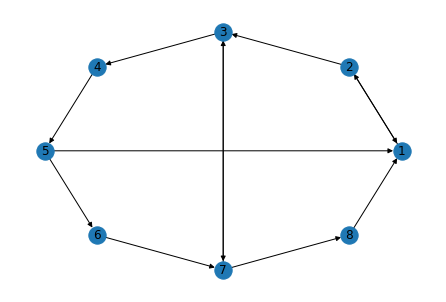

In [10]:
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

Menerapkan PageRank

In [11]:
def createPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_matrix(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(
        [1.0/count
        if count>0 else 0.0 for count in outwards])
    G = np.asarray(np.multiply(M.T, prob_outwards))
    p = np.ones(nodes_set)/float(nodes_set)
    if np.min(np.sum(G,axis=0)) < 1.0:
        print('WARN : G is substochastic')
    return G,p

In [12]:
G,p = createPageRank(myWeb)
print(G)

[[0.  0.5 0.  0.  0.5 0.  0.  1. ]
 [1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.5 0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0. ]]
